In [64]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [65]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [66]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [67]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [68]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [69]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [70]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station 

In [71]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [72]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date)[-1]
most_recent_date

('2017-08-23',)

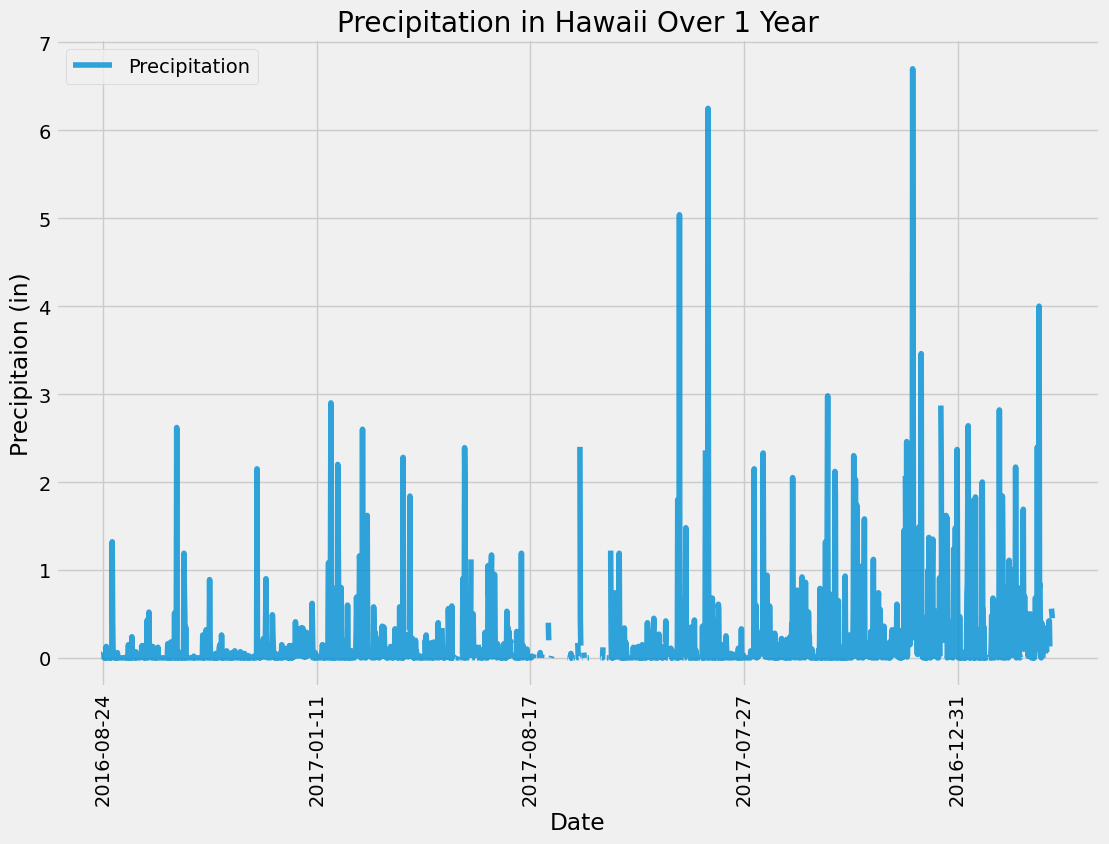

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
final_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
final_date_query = session.query(measurement.date, measurement.prcp).filter(measurement.date > final_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
final_date_query_df = pd.DataFrame(final_date_query)
final_date_query_df = final_date_query_df.set_index('date')

# Sort the dataframe by date
sorted_df = final_date_query_df.sort_index()
sorted_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
final_date_query_df.plot(title='Precipitation in Hawaii Over 1 Year', alpha=0.8, figsize=(12,8), rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitaion (in)')
plt.legend(['Precipitation'])
plt.show()


In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
final_date_query_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [75]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(station.station).distinct().count()
number_stations

9

In [76]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [77]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
most_active_station

[(54.0, 85.0, 71.66378066378067)]

In [78]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_active_station = session.query(measurement.tobs).filter(measurement.date >= final_date).filter(measurement.station == 'USC00519281').all()
temp_active_station

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


Text(0.5, 1.0, 'Temperatures at station USC00519281 from 2016-08-23 to 2017-08-23')

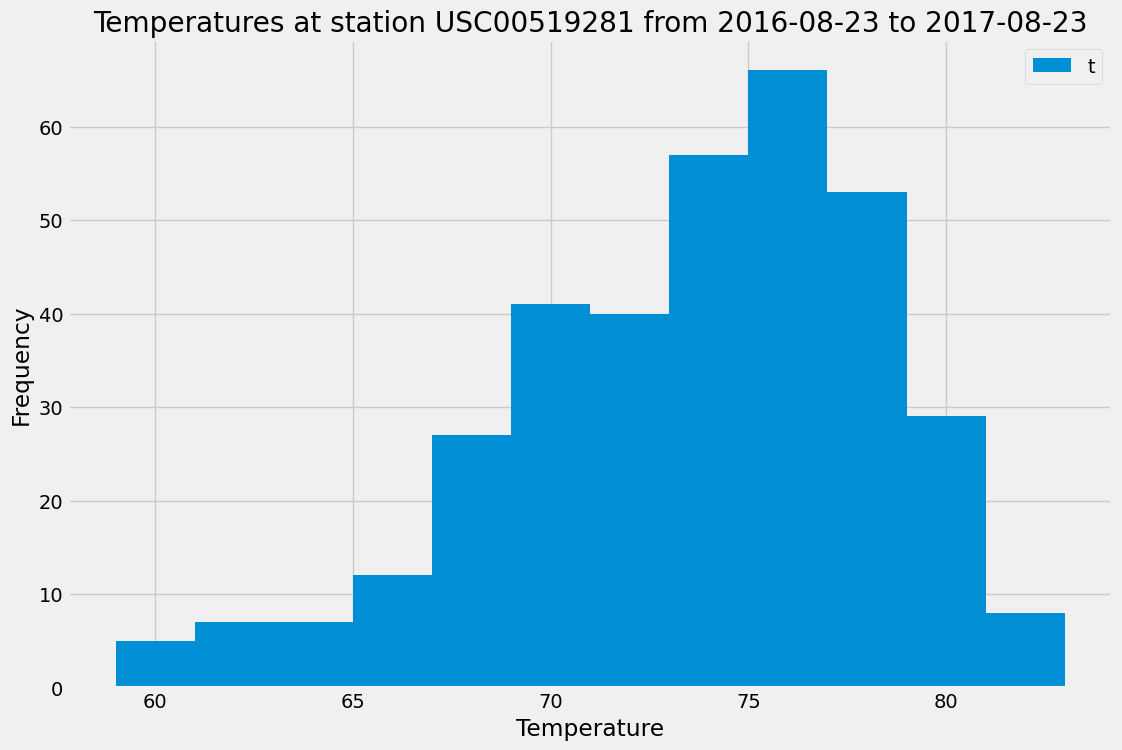

In [79]:

plt.figure(figsize=(12,8))
plt.hist(np.ravel(temp_active_station), bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.title(f"Temperatures at station USC00519281 from 2016-08-23 to 2017-08-23")

# Close session

In [80]:
# Close Session
session.close()